In [106]:
import math
import numpy as np
import random
pi = math.pi
import pandas as pd
import matplotlib as mpl
import scipy
import matplotlib.pyplot as plt
plt.ion()
#from matplotlib.legend_handler import LandlerTuple
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit
from scipy import signal
import re

mpl.rcdefaults()
mpl.style.use('default')

# Comment tLis to not Lave latex plots

mpl.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})


In [126]:
mycmap=["teal","mediumaquamarine","chocolate","sandybrown","blueviolet","violet","seagreen","darkseagreen"]
mycmap=["#003a7d","#008dff","#ff73b6","#c701ff","#4ecb8d","#ff9d3a","#f9e858","#d83034"]

s = 52.77
y = 0.469
xB = 0.118
zh = 0.379

print(np.sqrt(s*y*xB))

1.7089170079322167


In [192]:
df = pd.read_csv('AUT_LO.txt',header=None,sep=' ', decimal = '.')
xB = pd.read_csv('xB.txt',header=None,sep=' ', decimal = '.')
zh = pd.read_csv('zh.txt',header=None,sep=' ', decimal = '.')
#print(xB)
#print(df)
A_ofx_at_fized_z = df[4][:]

A_ofz_at_fized_x = df[:][4]

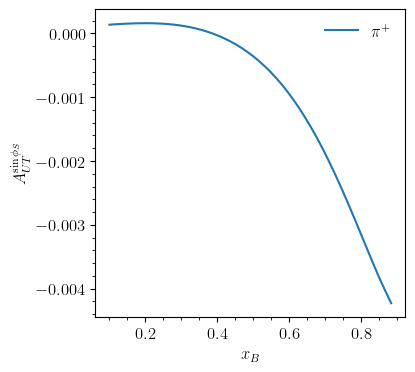

In [193]:

fs = 12
w = 4
h = 4
fig = plt.figure(figsize=(w,h))
plt.plot(xB, A_ofx_at_fized_z, label='$\\pi^+$')
#plt.xlim(0.05,0.25)
#plt.ylim(-0.02,0.02)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.minorticks_on()
plt.xlabel('$x_B$ ', fontsize = fs)
plt.ylabel('$A_{UT}^{\\sin \\phi_S }$', fontsize = fs)
plt.legend(fancybox= True, framealpha=0, loc='best', fontsize = fs, ncols=1)

#info = '$\\textbf{DSS FF set}$' + '\n'+ '$Q^2='+str(Q2)+'\\,\\textrm{GeV}^2$'
#plt.text(0.0006,2.0,info)
## Save figure if
#if(save == True):
#        plt.savefig('./output/fig/D1.pdf', dpi=300, bbox_inches='tight')

plt.show()

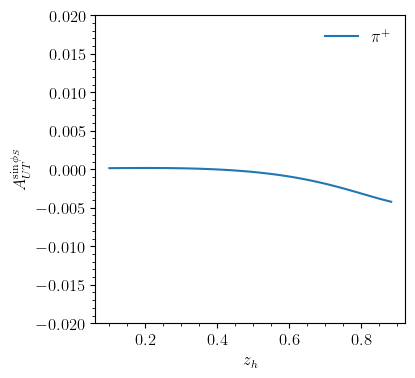

In [194]:

fs = 12
w = 4
h = 4
fig = plt.figure(figsize=(w,h))
plt.plot(zh, A_ofz_at_fized_x, label='$\\pi^+$')
#plt.xlim(0.25,0.55)
plt.ylim(-0.02,0.02)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
plt.minorticks_on()
plt.xlabel('$z_h$ ', fontsize = fs)
plt.ylabel('$A_{UT}^{\\sin \\phi_S }$', fontsize = fs)
plt.legend(fancybox= True, framealpha=0, loc='best', fontsize = fs, ncols=1)

#info = '$\\textbf{DSS FF set}$' + '\n'+ '$Q^2='+str(Q2)+'\\,\\textrm{GeV}^2$'
#plt.text(0.0006,2.0,info)
## Save figure if
#if(save == True):
#        plt.savefig('./output/fig/D1.pdf', dpi=300, bbox_inches='tight')

plt.show()

Sigma xz

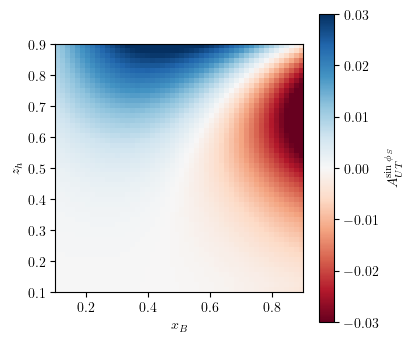

In [195]:
df = pd.read_csv('AUT_LO.txt',header=None,sep=' ', decimal = '.')
N=df.shape[0]


sqrtS = 100 # GeV
y=0.1

df=df.loc[:, df.columns != N].T
fs = 10
save_fig = True
cmap = mpl.cm.RdBu
cmap2 = plt.get_cmap('tab20')
w = 4
h = 4
fontsize = 13
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot()
extent = [0.1,0.9,0.1,0.9]
img = ax.imshow(df, extent=extent, cmap=cmap, interpolation='none',
                origin='lower', vmin=-0.03, vmax=0.03)
plt.colorbar(img,label = '$A_{UT}^{\\sin \\phi_S }$')
plt.xlabel("$x_B$", fontsize = fs)
plt.ylabel("$z_h$", fontsize = fs)
plt.xlim(0.1,0.9)
plt.ylim(0.1,0.9)
plt.xticks(fontsize = fs)
plt.yticks(fontsize = fs)
info = '$\\sqrt{s}=' + str(sqrtS)+'$ GeV\n$y=' + str(y)+'$'

#plt.text(0.05,0.83,info,fontsize=fs)
#if(save == True):
#        plt.savefig('./output/fig/dsigmadxdz.pdf', dpi=300, bbox_inches='tight')

plt.show()